In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Bengali/valid_gray.zip /content/
!cp /content/drive/My\ Drive/Bengali/train_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/valid_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/train_gray.zip /content/

In [4]:
!pip uninstall tensorflow
!pip install tensorflow-gpu

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
     |████████████████████████████████| 3.8MB 56.5MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 w

In [1]:
import cv2
from tqdm import tqdm_notebook as tqdm
import os
import zipfile
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tf.__version__

'2.1.0'

# Classifying Graheme Roots

In [0]:
!mkdir /content/valid_gray
!mv valid_gray.zip /content/valid_gray/
os.chdir('/content/valid_gray/')
!unzip valid_gray.zip

os.chdir('/content')

!mkdir /content/train_gray/
!mv train_gray.zip /content/train_gray/
os.chdir('/content/train_gray/')
!unzip train_gray.zip

os.chdir('/content')

In [0]:
train_gen_df = pd.read_csv('train_gen.csv', dtype=str)
valid_gen_df = pd.read_csv('valid_gen.csv', dtype=str)

### 167 unique target classes to train on

In [0]:
from tensorflow.keras.layers import Dense,BatchNormalization,MaxPool1D,Input,Dropout,Conv1D,Conv2D,Flatten,MaxPool2D,LeakyReLU # keras layers
from tensorflow.keras.models import Model #Model class
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [0]:
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(LeakyReLU(alpha=0.17))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(rate=0.35))
model.add(BatchNormalization(momentum=0.15))
model.add(Dropout(rate=0.3))
model.add(Dense(192, activation = "relu"))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_gen_df,
        directory='/content/train_gray/train_gray/',
        x_col="images",
        y_col="class",
        target_size=(126, 126),
        batch_size=32)

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_gen_df,
        directory='/content/valid_gray/valid_gray/',
        x_col="images",
        y_col="class",
        target_size=(126, 126),
        batch_size=32)

Found 199840 validated image filenames belonging to 168 classes.
Found 1000 validated image filenames belonging to 149 classes.


In [12]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              validation_steps=STEP_SIZE_VALID,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 6245 steps, validate for 31 steps
Epoch 1/10
6245/6245 [==============================] - 908s 145ms/step - loss: 1.1921e-07 - accuracy: 0.3564 - val_loss: 1.1921e-07 - val_accuracy: 0.3767
Epoch 2/10
6245/6245 [==============================] - 901s 144ms/step - loss: 1.1921e-07 - accuracy: 0.3580 - val_loss: 1.1921e-07 - val_accuracy: 0.3787
Epoch 3/10
6245/6245 [==============================] - 923s 148ms/step - loss: 1.1921e-07 - accuracy: 0.3568 - val_loss: 1.1921e-07 - val_accuracy: 0.3628
Epoch 4/10
6245/6245 [==============================] - 897s 144ms/step - loss: 1.1921e-07 - accuracy: 0.3552 - val_loss: 1.1921e-07 - val_accuracy: 0.3100
Epoch 5/10
6245/6245 [==============================] - 882s 141ms/step - loss: 1.1921e-07 - accuracy: 0.3561 - val_loss: 1.1921e-07 - val_accuracy: 0.4632
Epoch 6/10
6245/6245 [==============================] - 909s 145ms/step - l

In [0]:
import h5py
os.chdir('/content/')
model.save("model.h5")


In [15]:
from google.colab import files
files.download('/content/model.h5')

KeyboardInterrupt: ignored

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

hist_df = pd.DataFrame({'acc':acc, 'val_acc':val_acc, 'loss':loss, 'val_loss':val_loss})
hist_df.to_csv('hist.csv', index=False)

In [18]:
!cp /content/model.h5 /content/drive/My\ Drive/Bengali/
!cp /content/hist.csv /content/drive/My\ Drive/Bengali/

^C


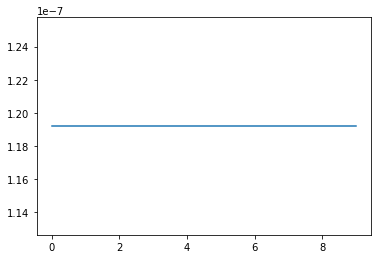

In [22]:
plt.plot(history.history['val_loss'])